In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

### Warm up questions

1. What does each column of X˜ represent?
- Each column of X˜ refers to the feature of the model. Refers to height in this model.

2. What does each row of X˜ represent?
- Each row of X˜ refers to one data point. Refers to a person in this model.

3. Why do we have 1’s in X˜?
- Increase model flexibility. The learnt model (regression line) may have a non-zero intercept but this may not be representative of the response variable. This is because the response variable refers to height. Even when all features are zero (maybe not in this case where we only have one feature which is weight), there should still be a base height for that person.
- By ensuring that the model has a y-intercept, it reduces biasness in the prediction as the model is not forced to forced to pass through the origin (0,0).

4. If we have heights and weights of 3 people, what would be the size of y and X˜? What would X˜(32) represent?
- Size of y: (3,)
- Size of X˜: (3,2) where offset column of 1's is included
- X˜(32) represents height of the third person

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    
    N = y.shape[0]
    err = y - tx.dot(w)
    return (1/N)*(err.T.dot(err))
    # ***************************************************

In [5]:
# test out function
# set w = [1,2]^T

print(f'Computed MSE: {compute_loss(y, tx, np.array([1,2]).T)}')

Computed MSE: 5388.96673177417


# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    # shape of grid_w0 and grid_w1: (10,)
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
           
            w = np.reshape(np.array([grid_w0[i], grid_w1[j]], dtype = np.float64), (2,))
            losses[i,j] = compute_loss(y, tx, w)
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356498, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.295 seconds


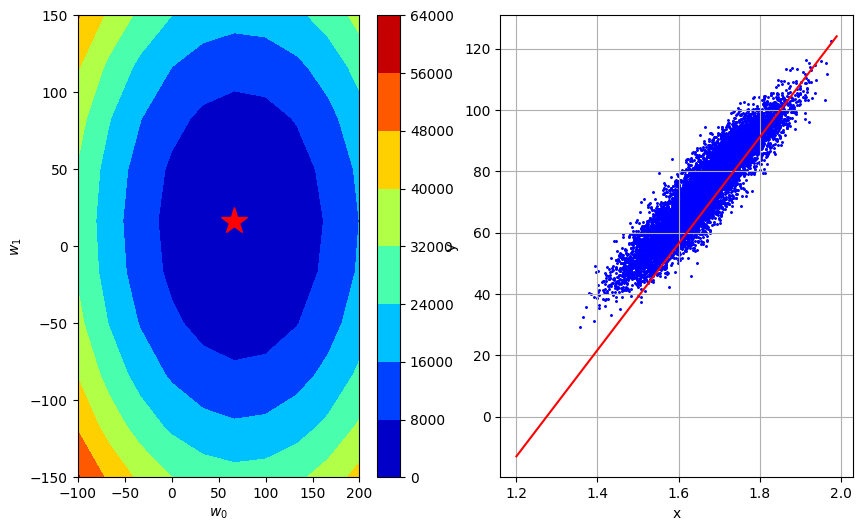

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
# With 10 intervals
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

### Analysis:

- No, the regression line seems further from majority of the points as compared to how close it is to the remainder minority of the points. This shows that the "optimal" weights derived from grid search can be further optimised.

- This problem can be solved if we use a finer grid instead. With a finer grid, the loss functions for each of the weights will be more continuous/smooth. This then allows for the MSE plot to be smoother as well. This is because we now have more coordinates to plot and the decrease in loss is now represented more gradually.

Grid Search: loss*=37.58708203904647, w0*=71.42857142857142, w1*=15.306122448979579, execution time=11.388 seconds


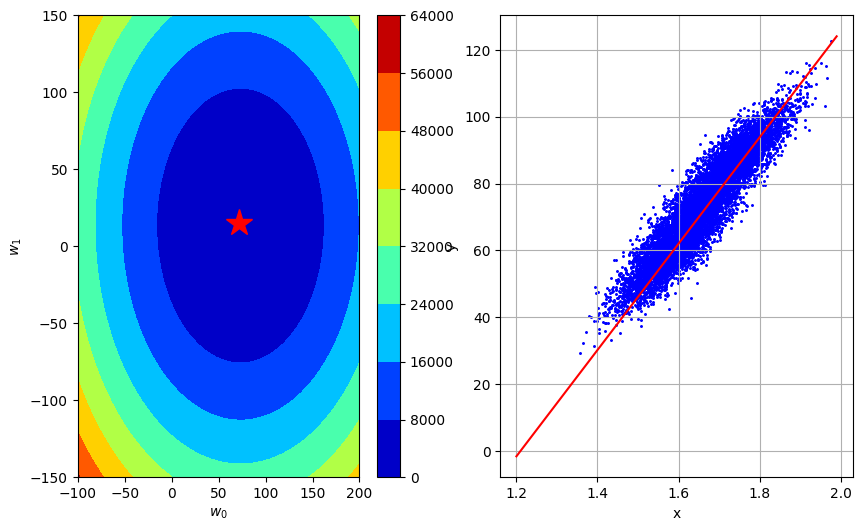

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
# With 50 intervals
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=31.220171304977594, w0*=73.36683417085428, w1*=12.8140703517588, execution time=133.651 seconds


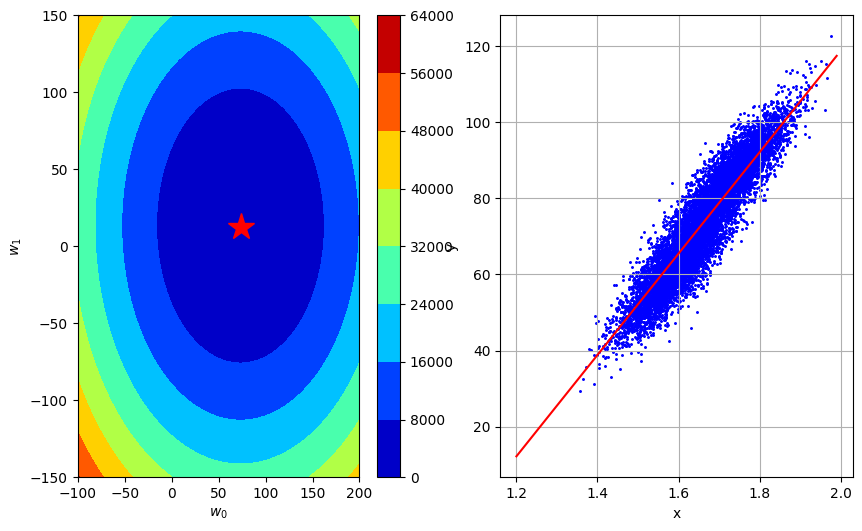

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
# With 50 intervals
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

### Observations

- To obtain an accurate fit, a fine grid is needed. Too coarse a grid may cause us to miss the optimal weights. This happens as we approaches the minimal loss hence optimal weight but we start to diverge from the minimal loss again when we test the next value out in the grid.

- Grid spacing needs to be small enough (fine enough grid) for us to be able to derive the optimal weights. However, after a certain degree of granularity (once the grid spacing is small enough), any further reduction in grid space does not make a difference.

- Increasing number of values slows down the code. The time complexity is O(b^d) where b is the number of values to try and d is the number of parameters to tune.

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [128]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    
    N = y.shape[0]
    e = y - tx.dot(w)
    return (-1/N)*(tx.T.dot(e))
    # ***************************************************

In [11]:
## Testing out with hand-picked values
y_dummy = np.array([65,50], dtype = np.float64)
tx_dummy = np.array([[1., 1.75], [1., 1.55]], dtype = np.float64)
w_dummy = np.array([4., 32.], dtype = np.float64)

print(f'Outputted gradients: {compute_gradient(y_dummy, tx_dummy, w_dummy)}')

Outputted gradients: [-0.7   -1.585]


Indeed, the `compute_gradient()` function gives the same results as hand calculated gradients.

In [12]:
## Testing out hand-picked weights with the actual data to be used

# Test 1: w0 = 100, w1 = 20
w = np.array([100., 20.], dtype = np.float64)
print(f'Outputted gradients: {compute_gradient(y, tx, w)}')
print(f'Norm of gradients: {np.linalg.norm(compute_gradient(y, tx, w))}')

# Test 2: w0 = 50, w1 = 10
w = np.array([50., 10.], dtype = np.float64)
print(f'Outputted gradients: {compute_gradient(y, tx, w)}')
print(f'Norm of gradients: {np.linalg.norm(compute_gradient(y, tx, w))}')

Outputted gradients: [26.706078    6.52028757]
Norm of gradients: 27.490521129292496
Outputted gradients: [-23.293922    -3.47971243]
Norm of gradients: 23.552392678247728


### Interpreting the above results

<u>Sign</u>
- To minimise loss, we need to go in the direction opposite of the gradient and update the weights accordingly.
- Test 1 produced gradients with positive sign. This means that the values of the weights need to be decreased to work towards optimality.
- Test 2 produced gradients with negative sign. This means that the values of the weights need to be increased to work towards optimality.

<u>Magnitude</u>
- Norm for test 1 vector larger than norm for test 2.
- This means that the values of weights used in test 1 is further from optimality than that in test 2. This is assuming gradient decreases closer to optimality.

Please fill in the functions `gradient_descent` below:

In [13]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        
        loss = compute_loss(y, tx, w)
        gradients = compute_gradient(y, tx, w)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        
        w = w - gamma*gradients
        # ***************************************************
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [14]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5584.473425518336, w0=7.32939220021052, w1=1.3479712434988977
GD iter. 1/49: loss=4529.270112060006, w0=13.925845180399987, w1=2.5611453626479053
GD iter. 2/49: loss=3674.5554281587615, w0=19.862652862570506, w1=3.653002069882013
GD iter. 3/49: loss=2982.236534198751, w0=25.205779776523975, w1=4.63567310639271
GD iter. 4/49: loss=2421.4582300911447, w0=30.014593999082095, w1=5.520077039252339
GD iter. 5/49: loss=1967.227803763982, w0=34.3425267993844, w1=6.316040578826006
GD iter. 6/49: loss=1599.301158438981, w0=38.237666319656476, w1=7.032407764442306
GD iter. 7/49: loss=1301.2805757257302, w0=41.74329188790135, w1=7.677138231496976
GD iter. 8/49: loss=1059.8839037279963, w0=44.89835489932173, w1=8.25739565184618
GD iter. 9/49: loss=864.3525994098325, w0=47.737911609600076, w1=8.779627330160462
GD iter. 10/49: loss=705.9722429121193, w0=50.29351264885059, w1=9.249635840643318
GD iter. 11/49: loss=577.6841541489717, w0=52.59355358417605, w1=9.672643500077887
GD ite

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Observations

<u>Is the cost being minimised?</u>
</br>
Yes, the cost is being minimised and eventually reaches the local minima (where the star is at).

<u>Is the algorithm converging? What can be said about the convergence speed?</u>
</br>
Yes, the algorithm is converging. The loss decreases from a large value and eventually converges to a value and remains constant.

<u>How good are the final values of w1 and w0 found?</u>
</br>
Final value seems decent. Equal number of data points above and below the fitted line.

### Further Experiments

<u>Differing values of step-size gamma</u>
</br>
- 0.001: Too slow, need much more iterations for loss to converge to minimum value
- 0.01: Faster progress but still not fast enough. Need more iterations for loss to converge to minimum value
- 0.5: Fast enough progress and manages to converge to minimum value within 34 iterations
- 1: Faster than 0.5 and manages to converge to minimum value within 1 iteration
- 2: Too fast. Oscillates between both ends of the loss function
- 2.5: Diverges

<u>Differing initial values of w0 and w1</u>
</br>
- Procedure still is able to converge. It is just that initial values that differ to a larger extent require more iterations to converge.

# 4. Stochastic gradient descent

In [168]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: Using SGD algorithm, compute the gradient using one data point at a time. Then, repeat for all data
    # points in the batch and take average
    
    # array to store results
    batch_size, num_params = y.shape[0], tx.shape[1]
    gradients = np.zeros((batch_size, num_params), dtype = np.float64)
    
    # compute gradients using each data point in the batch
    for idx in range(batch_size):
        gradients[idx,:] = compute_gradient(np.array([y[idx]]), tx[idx:,], w)
        
    # take average of gradients
    return np.mean(gradients, axis = 0)
    # ***************************************************

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.

        # Get batched data
        batched_data = list(batch_iter(y, tx, batch_size, num_batches = max_iters))
        batched_y, batched_tx = batched_data[n_iter]
        
        # Compute loss and gradient
        loss = compute_loss(batched_y, batched_tx, w)
        gradients = compute_stoch_gradient(batched_y, batched_tx, w)
        
        # Update weights
        w = w - gamma * gradients
        
        # Append loss and gradient to array
        ws.append(w)
        losses.append(loss)       
        # ***************************************************
        
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [179]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=8142.651829948517, w0=9.023664349890524, w1=8.405632256502436
SGD iter. 1/49: loss=4583.288923684645, w0=15.793663554975149, w1=11.729823931058304
SGD iter. 2/49: loss=2733.5117130138337, w0=21.021963195406858, w1=11.126221924874923
SGD iter. 3/49: loss=2831.3137530331833, w0=26.342972266093717, w1=15.628692274358816
SGD iter. 4/49: loss=3566.9968981694187, w0=32.31540635796063, w1=18.56771213317997
SGD iter. 5/49: loss=2314.0173868986, w0=37.125829818425004, w1=21.59088764872538
SGD iter. 6/49: loss=1025.6599036556288, w0=40.32842236768198, w1=22.910800777229092
SGD iter. 7/49: loss=828.4830373616303, w0=43.20676049472965, w1=22.415296712936367
SGD iter. 8/49: loss=1621.0614015054396, w0=47.23300117494915, w1=19.05446398632272
SGD iter. 9/49: loss=1060.7566629479325, w0=50.4899271227532, w1=20.3485196170003
SGD iter. 10/49: loss=1150.4729554885998, w0=53.881789377457245, w1=18.412939987705734
SGD iter. 11/49: loss=303.41348034526055, w0=55.623666182358384, w1=20.9

In [180]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Comparison with gradient descent procedures
- Instead of performing computations on the whole dataset, we selectively perform the calculations on a subset of the whole dataset.

# 5. Effect of Outliers and MAE Cost Function

## Using lesser data

In [19]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [20]:
y.shape, tx.shape

((200,), (200, 2))

In [21]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5658.544448876833, w0=51.54259072181183, w1=10.132993413506076
GD iter. 1/49: loss=534.100051755883, w0=67.00536793835533, w1=13.172891437557823
GD iter. 2/49: loss=72.90005601500054, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/49: loss=31.392056398321277, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=27.65633643282016, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=27.320121635925045, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=27.28986230420449, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=27.287138964349637, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=27.286893863762707, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=27.28687180470987, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=27.286869819395115, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=27.286869640716795, w0=73.6322333285226, w1=14.475697183454017


In [22]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

## Adding outlier data

In [23]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [24]:
y.shape, tx.shape

((202,), (202, 2))

In [25]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5739.670229071707, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=636.5642494031899, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=177.2847112330252, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=135.9495527977104, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=132.22938853853208, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=131.8644404247067, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=131.86172842496174, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=131.86148434498475, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=131.86146237778675, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=131.86146040073896, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=131.86146022280465, w0=74.06776649225756, w1=11.034889001593537

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Observations
- Not a good fit. MSE loss seems sensitive to the outlier as the presence of outliers have caused the fitted line to be shifted upwards.

# 6. Subgradient descent

In [27]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE

    def get_subgradient(error):
        
        subgradients = np.empty(error.shape, dtype = np.float32)
        
        for i in range(len(error)):
            
            if error[i] < 0:
                subgradients[i] = -1.
            elif error[i] > 0:
                subgradients[i] = 1.
            else:
                subgradients[i] = np.random.uniform(-1.0, 1.0)
    
        return subgradients
    
    N = y.shape[0]
    e = y - tx.dot(w)
    subgradient = get_subgradient(e)

    return -(1/N)*(tx.T).dot(subgradient)
    # ***************************************************

In [28]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        
        # Compute loss
        N = y.shape[0]
        loss = (1/N)*np.sum(abs(y - tx.dot(w)), axis = 0)
        
        # Compute gradients
        sub_gradients = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w - gamma*sub_gradients
        # ***************************************************
       
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [29]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=8.756471895211877e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.7512943790423754e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=2.626941568563563e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8, w1=3.502588758084751e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=4.378235947605939e-15
SubGD iter. 5/499: loss=70.56780585492639, w0=4.2, w1=5.253883137127127e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=6.1295303266483146e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=7.88082470569069e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=8.756471895211878e-15
SubGD iter. 10/499: loss=67.06780585492639, w0=7.700000000000001, w1=9.632119084733065e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=1.0507766274254253e-14
SubGD iter.

In [30]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [31]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        
        # Get batched data
        batched_data = list(batch_iter(y, tx, batch_size, num_batches = max_iters))
        batched_y, batched_tx = batched_data[n_iter]
        
        # Compute loss
        N = y.shape[0]
        loss = (1/N)*np.sum(abs(y - tx.dot(w)), axis = 0)
        
        # Compute gradients
        sub_gradients = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w - gamma*sub_gradients
        # ***************************************************
        # ***************************************************
        
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [32]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 16

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=8.756471895211877e-16
SubSGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.7512943790423754e-15
SubSGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=2.626941568563563e-15
SubSGD iter. 3/499: loss=71.96780585492637, w0=2.8, w1=3.502588758084751e-15
SubSGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=4.378235947605939e-15
SubSGD iter. 5/499: loss=70.56780585492639, w0=4.2, w1=5.253883137127127e-15
SubSGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=6.1295303266483146e-15
SubSGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubSGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=7.88082470569069e-15
SubSGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=8.756471895211878e-15
SubSGD iter. 10/499: loss=67.06780585492639, w0=7.700000000000001, w1=9.632119084733065e-15
SubSGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=1.0507766274254253e-14

In [33]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>